In [1]:
import sys
sys.path.append('C:\\Users\\navid\\Documents\\projects\\GitHub\\ML_from_scratch\\src')
from KNN import KNearestNeighbor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import normal
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

## Classification

### Generating Artificial Data

In [49]:
X, y = make_blobs(n_samples= 300, cluster_std=[2.0,2.0,3.0], random_state=20)

Text(0, 0.5, 'feature2')

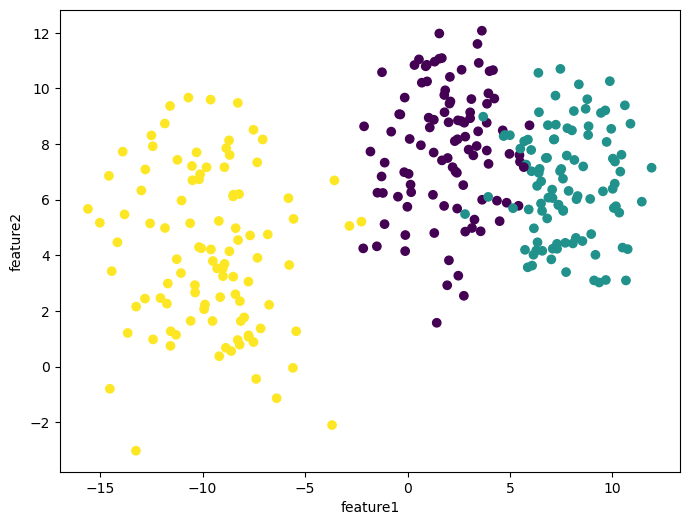

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('feature1')
plt.ylabel('feature2')

### Splitting data into train and test datasets

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

### Performing K-Nearest Neighbor Classification

In [77]:
KNN = KNearestNeighbor(k=3)

In [79]:
KNN.fit(X_train, y_train)

In [81]:
y_pred = KNN.predict(X_test)

In [83]:
KNN.accuracy_score(y_test, y_pred)

0.95

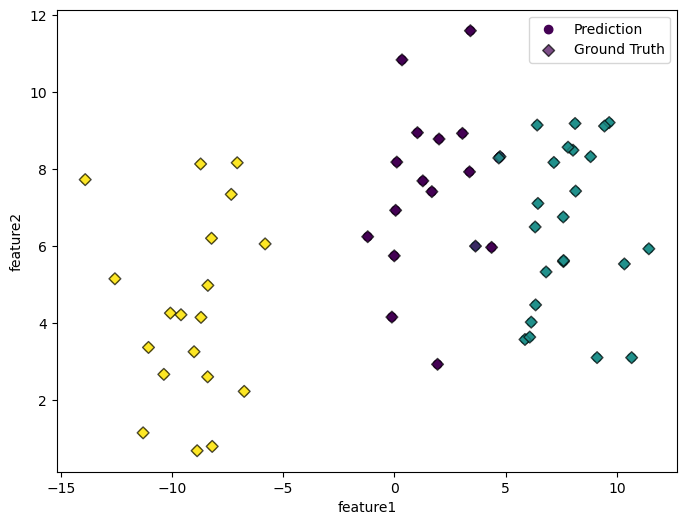

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, label='Prediction')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolor='k', marker= 'D', alpha= 0.7, label='Ground Truth')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()

## Regression

### Generating Artificial Data

In [87]:
X = np.linspace(-5,5,300)
y = X + 10 + normal(scale=2.0, size=len(X))

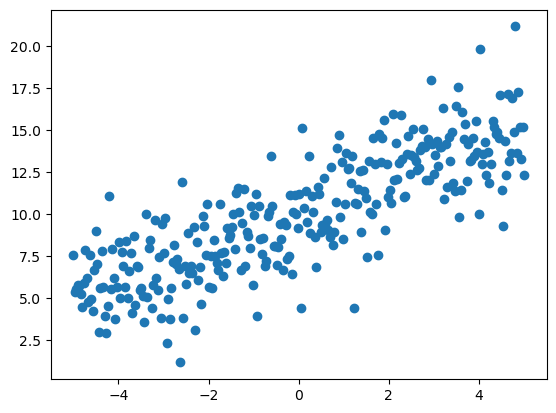

In [89]:
plt.scatter(X, y)

### Splitting data into train and test datasets

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

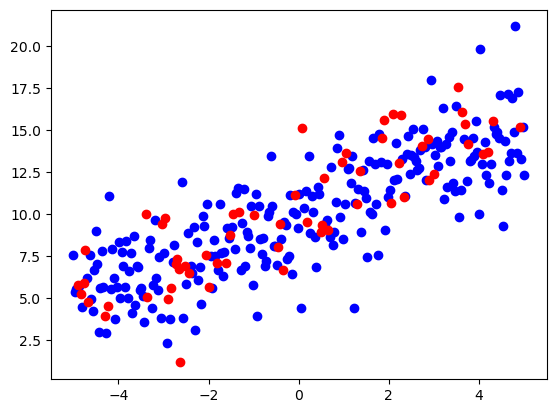

In [94]:
plt.plot(X_train, y_train, 'ob')
plt.plot(X_test, y_test, 'or')

### Performing K-Nearest Neighbor Regression

In [96]:
KNN = KNearestNeighbor(k=5, mode='regression')

In [98]:
KNN.fit(X_train, y_train)

In [100]:
y_pred = KNN.predict(X_test)

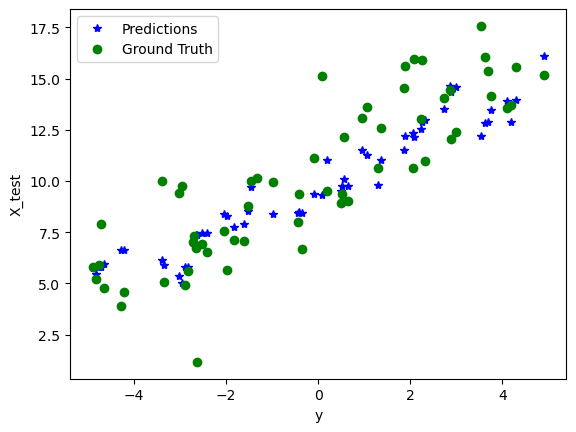

In [113]:
plt.plot(X_test, y_pred, '*b', label = 'Predictions')
plt.plot(X_test, y_test, 'og', label = 'Ground Truth')
plt.xlabel('y')
plt.ylabel('X_test')
plt.legend()

### Comparing results to Scikit-learn

In [106]:
from sklearn.neighbors import KNeighborsRegressor

X_train_v = X_train.reshape(-1,1)
X_test_v = X_test.reshape(-1,1)

KNNsk = KNeighborsRegressor(n_neighbors=5, algorithm='brute')
KNNsk.fit(X_train_v, y_train)
ysk_pred = KNNsk.predict(X_test_v)

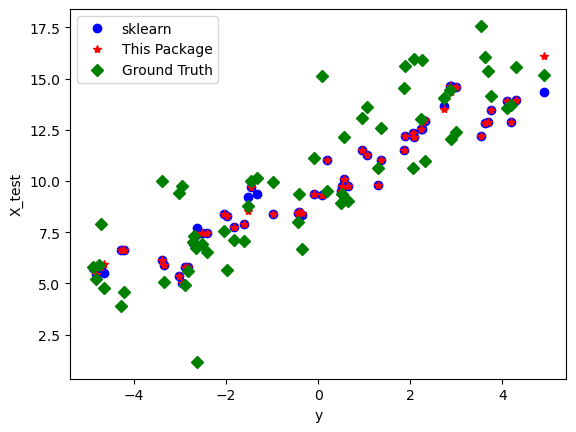

In [110]:
plt.plot(X_test, ysk_pred, 'ob', label='sklearn')
plt.plot(X_test, y_pred, '*r', label = 'This Package')
plt.plot(X_test, y_test, 'Dg', label = 'Ground Truth')
plt.xlabel('y')
plt.ylabel('X_test')
plt.legend()